# 🧭 AI Ops Triage Evaluation Dashboard
This notebook summarizes the performance of the AI-driven triage model, analyzing accuracy and identifying common misroutes across operational teams.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/evaluation_results.csv")
df.head()


,case_id,case_type,routed_team,final_team,resolution_summary,resolution_time_hours,repeat_routing,case_title,case_description,priority,source,product_area,current_owner,status,predicted_team,correct
0,C001,Security Token Error,Infra,FinOps,Sample past resolution outcome,8,1,Refund Delay,Auto-generated example describing refund delay,Low,Internal Alert,Payments,FinOps,Closed,FinOps,True
1,C002,Security Token Error,Support,Infra,Sample past resolution outcome,20,0,Login Failure,Auto-generated example describing login failure,Low,Internal Alert,Billing,FinOps,Closed,FinOps,False
2,C003,Login Failure,Infra,FinOps,Sample past resolution outcome,12,1,Login Failure,Auto-generated example describing login failure,Medium,Slack Escalation,Support,FinOps,Closed,Support,False
3,C004,Deployment Rollback,Security,Support,Sample past resolution outcome,24,1,Payment API Timeout,Auto-generated example describing payment api ...,Low,Customer Ticket,Infra,Infra,In-Progress,Infra,False
4,C005,Security Token Error,Support,FinOps,Sample past resolution outcome,13,0,Payment API Timeout,Auto-generated example describing payment api ...,High,Customer Ticket,Security,Support,In-Progress,FinOps,True


In [3]:
#Accuracy Summary
total_cases = len(df)
accuracy = df["correct"].mean()

print("📊 Evaluation Summary")
print(f"Total Cases Evaluated: {total_cases}")
print(f"Overall Accuracy: {accuracy:.2%}")

team_accuracy = df.groupby("final_team")["correct"].mean().sort_values(ascending=False)
team_accuracy


📊 Evaluation Summary
Total Cases Evaluated: 50
Overall Accuracy: 30.00%


final_team
Infra       0.428571
FinOps      0.411765
Support     0.111111
Security    0.100000
Name: correct, dtype: float64

/var/folders/vm/v471hb914vd6np97x08896n80000gn/T/ipykernel_52990/2462810114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_accuracy.index, y=team_accuracy.values, palette="viridis")


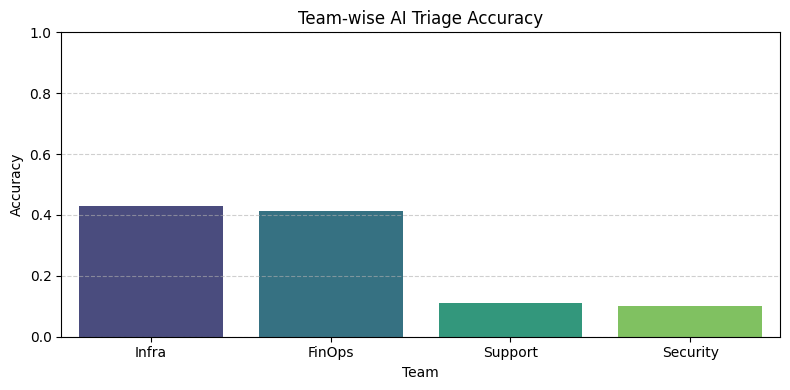

In [4]:
#Viz
plt.figure(figsize=(8,4))
sns.barplot(x=team_accuracy.index, y=team_accuracy.values, palette="viridis")
plt.title("Team-wise AI Triage Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Team")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


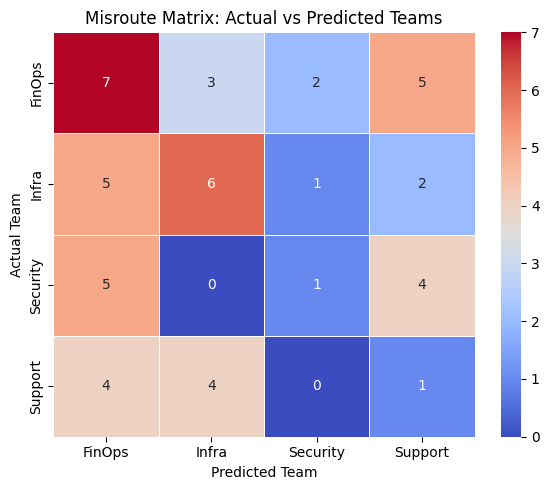

In [5]:
#Misroute Heatmap
pivot = df.groupby(["final_team", "predicted_team"]).size().unstack(fill_value=0)
plt.figure(figsize=(6,5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.title("Misroute Matrix: Actual vs Predicted Teams")
plt.xlabel("Predicted Team")
plt.ylabel("Actual Team")
plt.tight_layout()
plt.show()


## 💬 Interpretation
- **Highest Accuracy:** (Write your top-performing team)
- **Frequent Misroutes:** (Describe patterns you notice)
- **Next Steps:** (How can you improve prompts or org map data?)

This section is for your analytical storytelling — think of it as your project summary for stakeholders or portfolio readers.
